In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('income.csv')

In [8]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

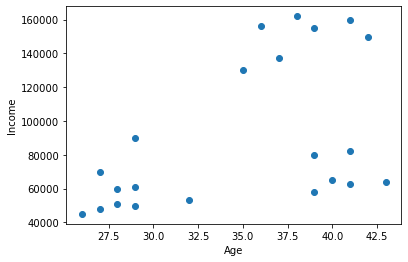

In [9]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [11]:
km = KMeans(n_clusters=3)

In [12]:
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [14]:
df['cluster'] = y_pred
df.head(10)

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [20]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

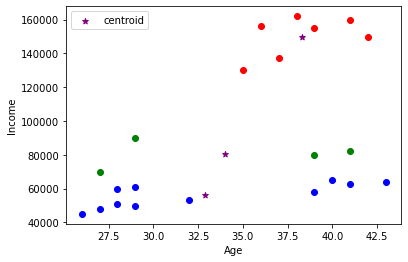

In [22]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income'], color='g')
plt.scatter(df2['Age'], df2['Income'], color='r')
plt.scatter(df3['Age'], df3['Income'], color='b')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [23]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [27]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
df['cluster'] = y_pred
df.head(10)

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [29]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [31]:
km.inertia_

0.4750783498553097

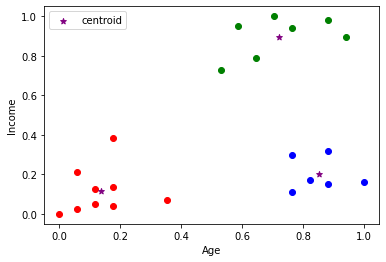

In [30]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income'], color='g')
plt.scatter(df2['Age'], df2['Income'], color='r')
plt.scatter(df3['Age'], df3['Income'], color='b')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [32]:
### Elbow method

sse = []
k_r = range(1,10)
for k in k_r:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

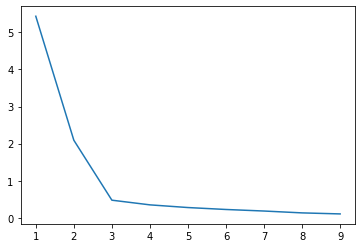

In [33]:
plt.plot(k_r, sse)